In [1]:
# Ensure required packages are installed in this Python environment
import sys
import subprocess
required = ['pandas', 'matplotlib', 'seaborn']
for pkg in required:
    try:
        __import__(pkg)
    except Exception:
        print(f'Installing {pkg}...')
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg])
print('Required packages are installed (or were installed just now).')

Required packages are installed (or were installed just now).


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("preprocessedPhase3FoodFacts.csv")

In [4]:
tabular_cols = df.select_dtypes(include=["number"]).columns
print(tabular_cols)

Index(['barcode', 'nutriscore_letter', 'nova_group', 'energy_kcal_100g',
       'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'contains_palm_oil',
       'vegetarian_status', 'vegan_status', 'nutrient_level_fat',
       'nutrient_level_saturated_fat', 'nutrient_level_sugars',
       'nutrient_level_salt', 'ecoscore_grade', 'ecoscore_score',
       'carbon_footprint_100g', 'additives_count', 'sugar_ratio',
       'energy_density', 'protein_ratio', 'macro_balance', 'healthy_score',
       'log_energy_kcal_100g', 'log_fat_100g', 'log_sugars_100g',
       'log_salt_100g', 'has_image', 'has_image_160'],
      dtype='object')


In [5]:
feature_cols = [
    'nova_group', 'energy_kcal_100g', 'fat_100g',
    'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
    'proteins_100g', 'salt_100g', 'contains_palm_oil', 'vegetarian_status', 'vegan_status',
    'nutrient_level_fat', 'nutrient_level_saturated_fat',
    'nutrient_level_sugars', 'nutrient_level_salt', 'ecoscore_grade', 'ecoscore_score',
    'carbon_footprint_100g', 'additives_count', 'sugar_ratio',
    'energy_density', 'protein_ratio', 'macro_balance', 'healthy_score',
    'log_energy_kcal_100g', 'log_fat_100g', 'log_sugars_100g',
    'log_salt_100g'
]

In [7]:
#Show ALL columns permanently in this notebook
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_rows", None)

In [8]:
# Make sure nova_group is numeric if it isn't already
df["nova_group"] = pd.to_numeric(df["nova_group"], errors="coerce")
df["vegetarian_status"] = pd.to_numeric(df["vegetarian_status"], errors="coerce")
df["vegan_status"] = pd.to_numeric(df["vegan_status"], errors="coerce")

# Class balance of Nutri-Score
print(df["nutriscore_letter"].value_counts(dropna=False))
print("\nClass proportions:")
print(df["nutriscore_letter"].value_counts(normalize=True))

# Basic stats for your features
print("\n=== Numeric feature summary ===")
print(df[feature_cols].describe(percentiles=[0.25, 0.5, 0.75]))

# Missingness per feature
print("\n=== Missing value ratios ===")
print(df[feature_cols].isna().mean().sort_values(ascending=False))

nutriscore_letter
5.0    1152
3.0    1050
2.0     992
1.0     991
4.0     987
Name: count, dtype: int64

Class proportions:
nutriscore_letter
5.0    0.222738
3.0    0.203016
2.0    0.191802
1.0    0.191609
4.0    0.190835
Name: proportion, dtype: float64

=== Numeric feature summary ===
        nova_group  energy_kcal_100g     fat_100g  saturated_fat_100g  \
count  5172.000000       5172.000000  5172.000000         5172.000000   
mean      3.738979        399.326373    18.621875            5.146010   
std       0.440113        154.586637    15.438149            6.781895   
min       2.000000          0.000000     0.000000            0.000000   
25%       3.000000        325.750000     4.900000            0.700000   
50%       4.000000        434.000000    16.100000            2.400000   
75%       4.000000        507.000000    28.000000            6.670000   
max       4.000000        857.000000   100.000000           46.670000   

       carbohydrates_100g  sugars_100g   fiber_100g  p

In [9]:
# Group stats by Nutri-Score
group_stats = df.groupby("nutriscore_letter")[feature_cols].mean()
print("\n=== Mean values by Nutri-Score ===")
print(group_stats)


=== Mean values by Nutri-Score ===
                   nova_group  energy_kcal_100g   fat_100g  \
nutriscore_letter                                            
1.0                  3.660949        325.563068  15.907387   
2.0                  3.740927        293.151210  10.466078   
3.0                  3.626667        414.614286  18.893079   
4.0                  3.771023        456.410334  21.579712   
5.0                  3.879340        491.367188  25.198663   

                   saturated_fat_100g  carbohydrates_100g  sugars_100g  \
nutriscore_letter                                                        
1.0                          2.470698           34.155800     2.970322   
2.0                          1.540173           54.464782     2.712541   
3.0                          2.697802           51.504623     8.514504   
4.0                          5.238743           56.040891    14.640865   
5.0                         12.704444           57.870424    33.780030   

          

In [10]:
plt.rcParams["figure.figsize"] = (8, 5)

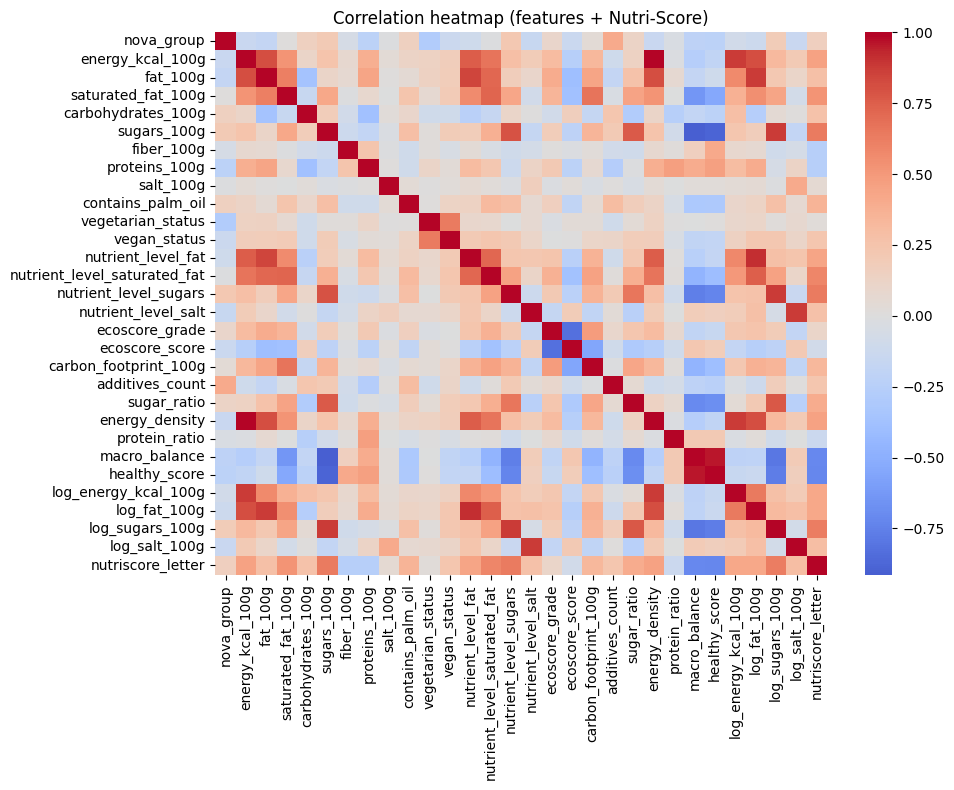

In [11]:
corr_cols = feature_cols + ["nutriscore_letter"]
corr = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=False,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation heatmap (features + Nutri-Score)")
plt.tight_layout()
plt.show()

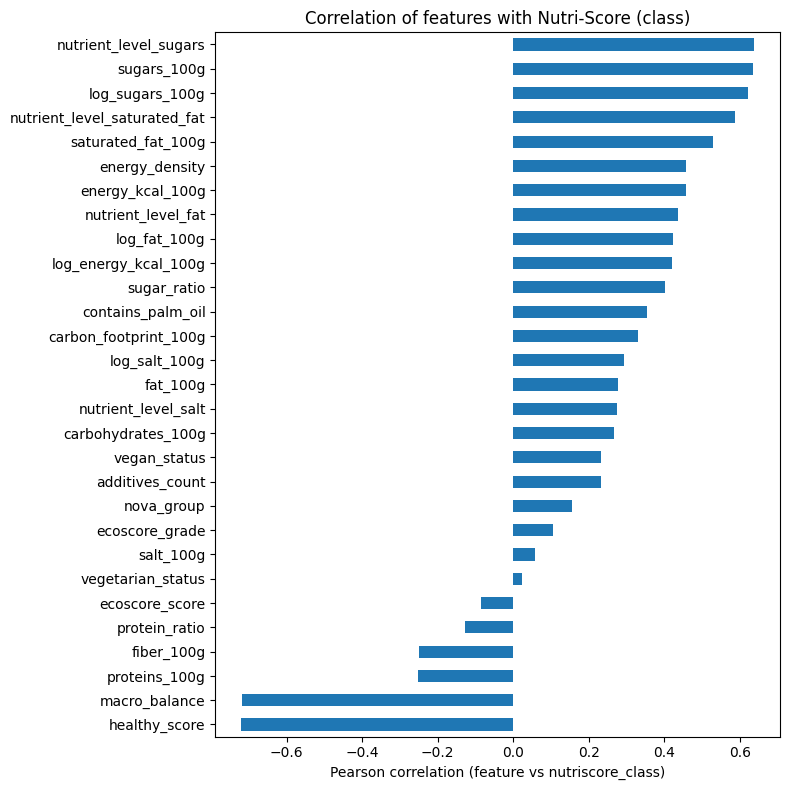

In [12]:
target_corr = corr["nutriscore_letter"].drop("nutriscore_letter").sort_values()

plt.figure(figsize=(8, 8))
target_corr.plot(kind="barh")
plt.title("Correlation of features with Nutri-Score (class)")
plt.xlabel("Pearson correlation (feature vs nutriscore_class)")
plt.tight_layout()
plt.show()

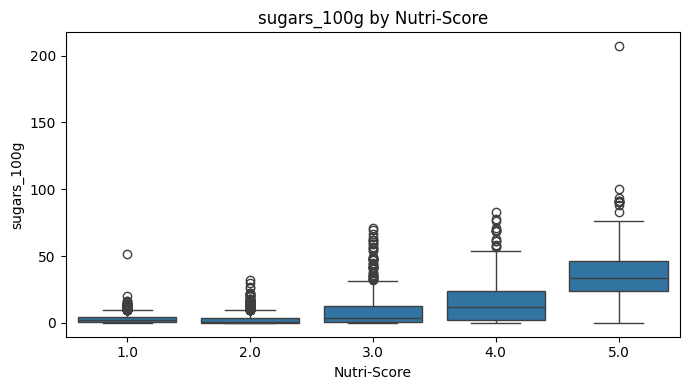

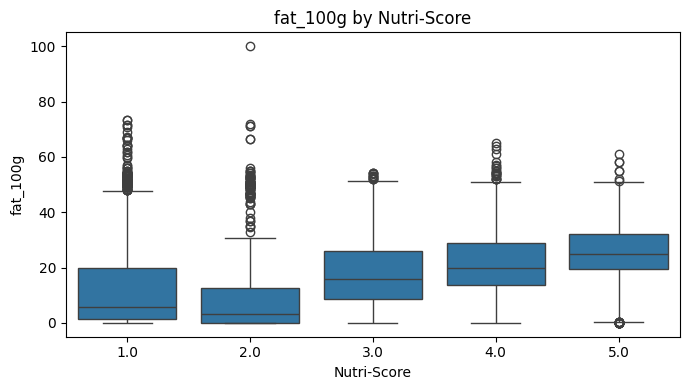

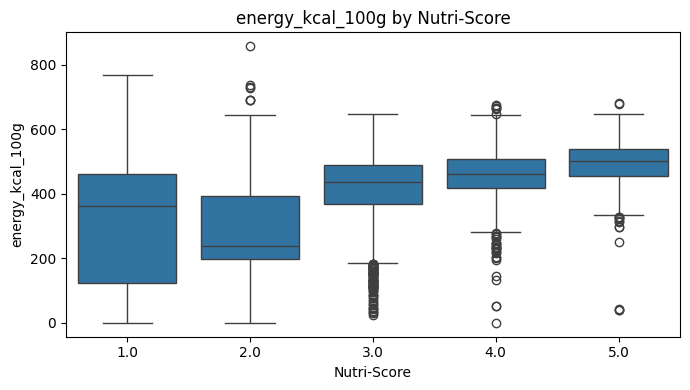

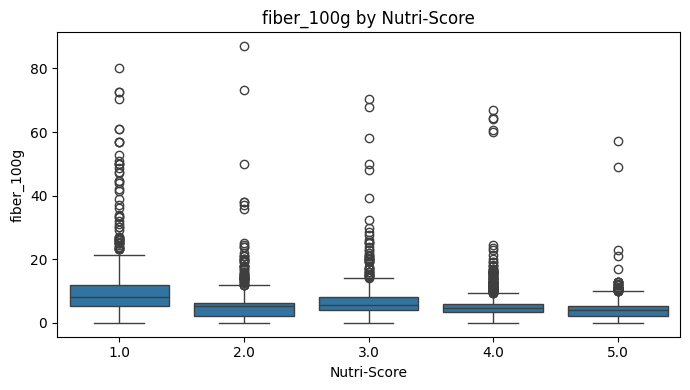

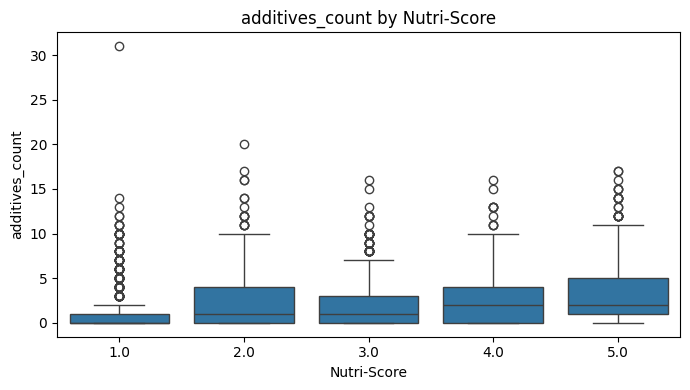

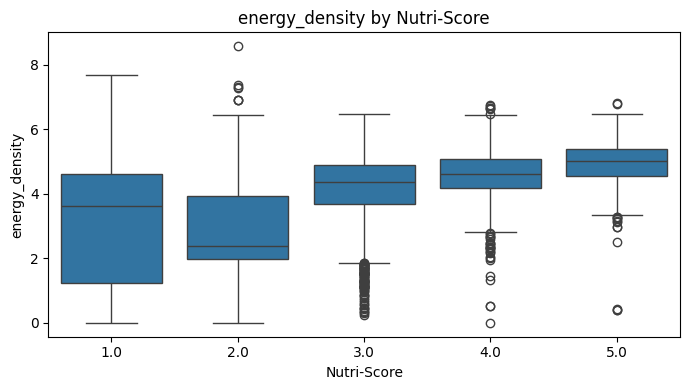

In [13]:
key_features = [
    "sugars_100g",
    "fat_100g",
    "energy_kcal_100g",
    "fiber_100g",
    "additives_count",
    "energy_density"
]

for col in key_features:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        sns.boxplot(
            x="nutriscore_letter",
            y=col,
            data=df,
            order = [1.0, 2.0, 3.0, 4.0, 5.0]
        )
        plt.title(f"{col} by Nutri-Score")
        plt.xlabel("Nutri-Score")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

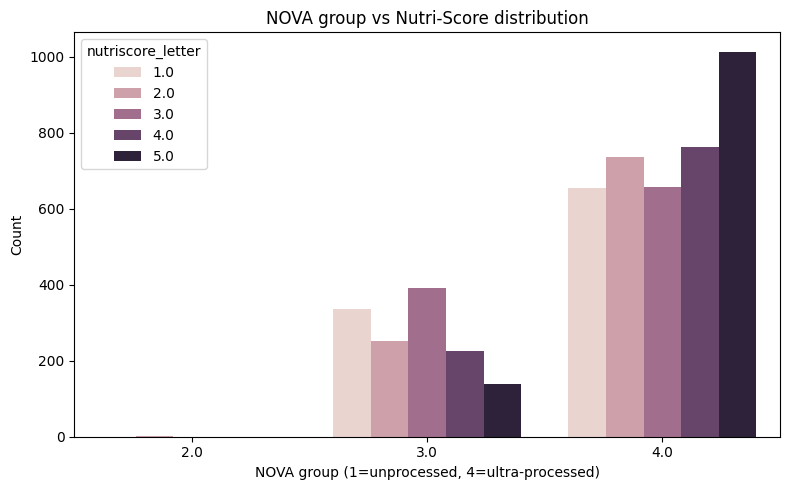

In [14]:
plt.figure()
sns.countplot(
    data=df,
    x="nova_group",
    hue="nutriscore_letter",
    hue_order=["A", "B", "C", "D", "E"]
)
plt.title("NOVA group vs Nutri-Score distribution")
plt.xlabel("NOVA group (1=unprocessed, 4=ultra-processed)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

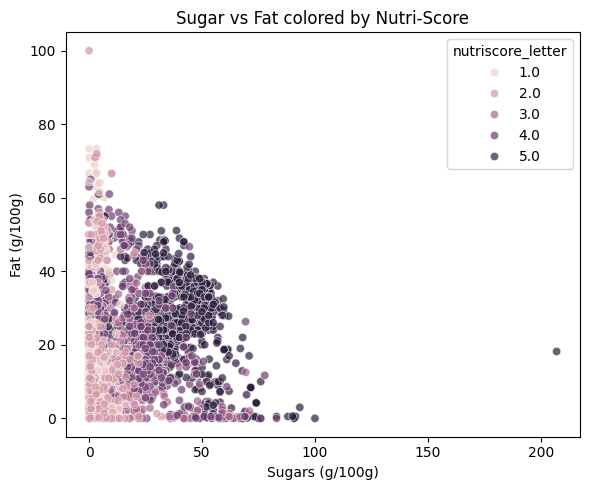

In [15]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x="sugars_100g",
    y="fat_100g",
    hue="nutriscore_letter",
    hue_order=["A", "B", "C", "D", "E"],
    alpha=0.7
)
plt.title("Sugar vs Fat colored by Nutri-Score")
plt.xlabel("Sugars (g/100g)")
plt.ylabel("Fat (g/100g)")
plt.tight_layout()
plt.show()

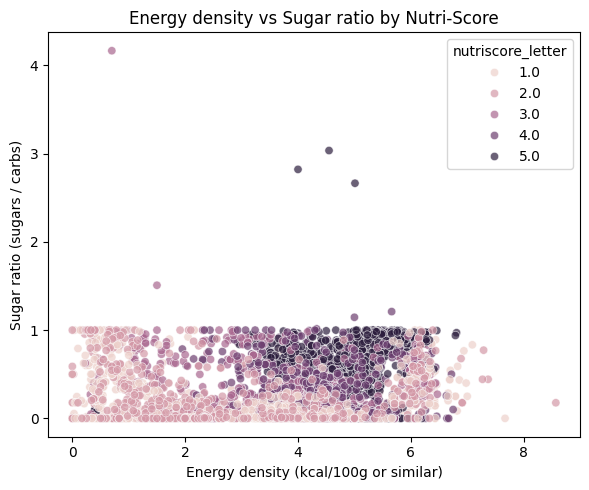

In [16]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x="energy_density",
    y="sugar_ratio",
    hue="nutriscore_letter",
    hue_order=["A", "B", "C", "D", "E"],
    alpha=0.7
)
plt.title("Energy density vs Sugar ratio by Nutri-Score")
plt.xlabel("Energy density (kcal/100g or similar)")
plt.ylabel("Sugar ratio (sugars / carbs)")
plt.tight_layout()
plt.show()

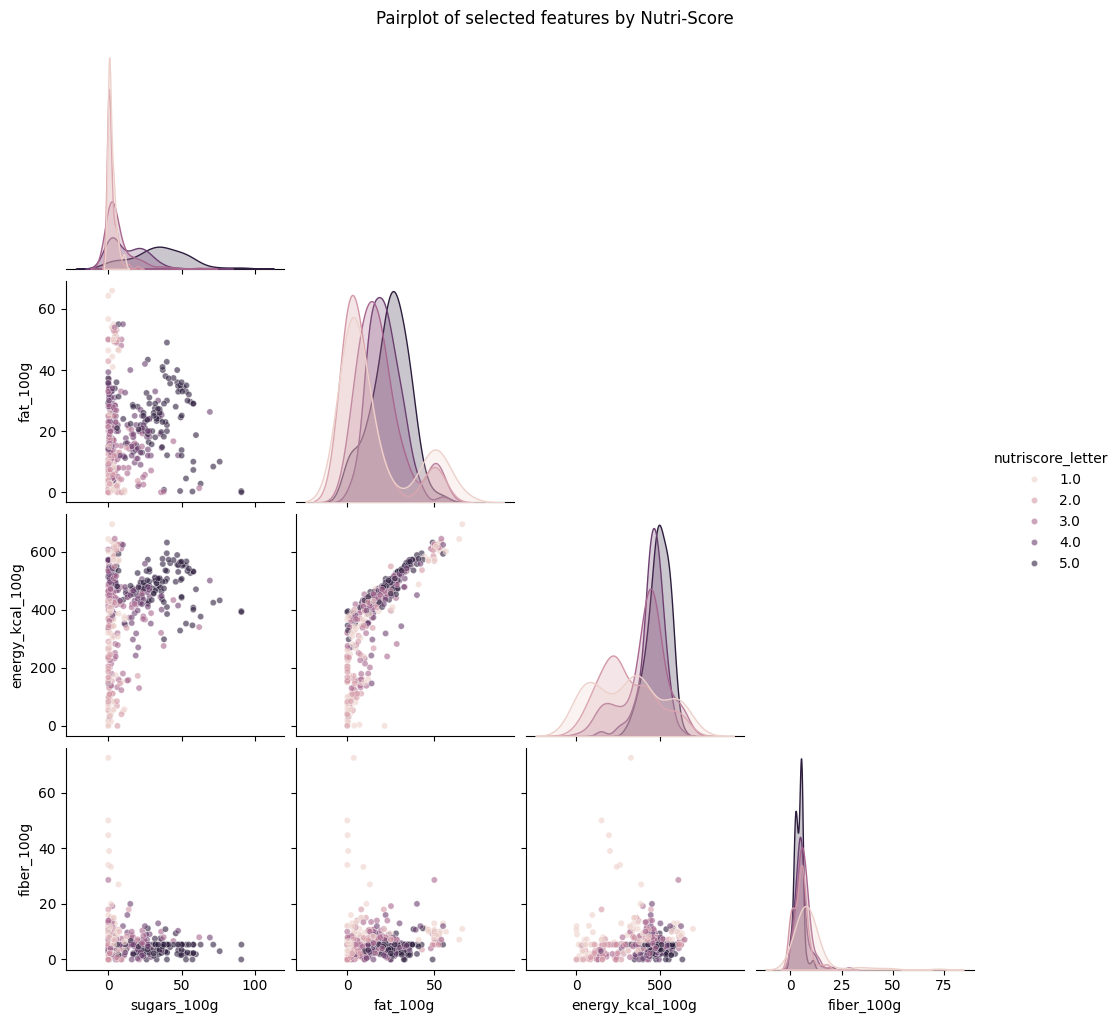

In [17]:
sample = df.sample(n=min(500, len(df)), random_state=42)

sns.pairplot(
    sample,
    vars=["sugars_100g", "fat_100g", "energy_kcal_100g", "fiber_100g"],
    hue="nutriscore_letter",
    hue_order=["A", "B", "C", "D", "E"],
    corner=True,
    plot_kws={"alpha": 0.6, "s": 20}
)
plt.suptitle("Pairplot of selected features by Nutri-Score", y=1.02)
plt.show()

In [18]:
cat_features = ['vegetarian_status', 'vegan_status', 'ecoscore_grade']

for col in cat_features:
    print(f"\n=== Value Counts for {col} ===")
    print(df[col].value_counts(dropna=False))



=== Value Counts for vegetarian_status ===
vegetarian_status
1.0    2666
0.0    2506
Name: count, dtype: int64

=== Value Counts for vegan_status ===
vegan_status
1.0    3592
0.0    1580
Name: count, dtype: int64

=== Value Counts for ecoscore_grade ===
ecoscore_grade
2.0    2250
3.0     907
4.0     779
1.0     730
5.0     506
Name: count, dtype: int64


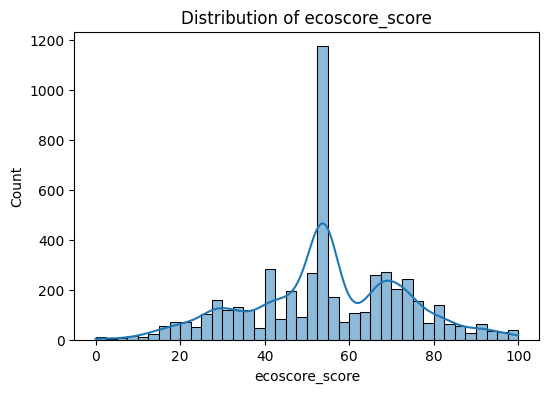

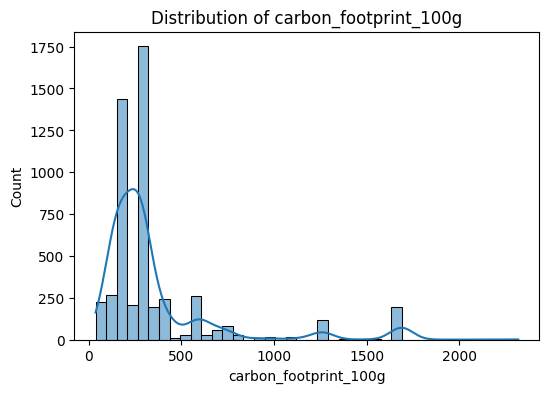

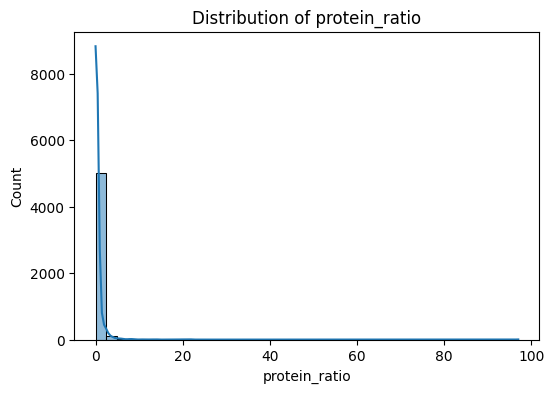

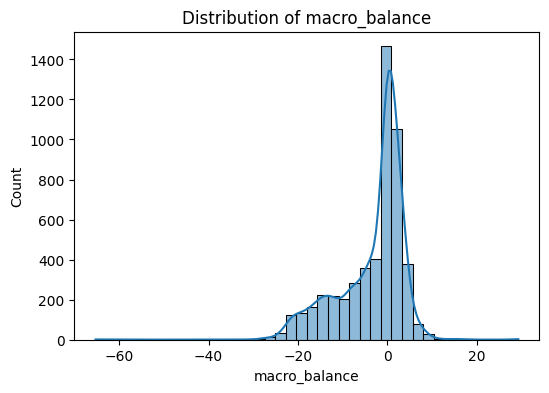

In [19]:
num_features = ['ecoscore_score', 'carbon_footprint_100g', 
                'protein_ratio', 'macro_balance']

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Distribution of {col}")
    plt.show()

In [20]:
features = [
    'vegetarian_status', 'vegan_status', 
    'ecoscore_grade', 'ecoscore_score',
    'carbon_footprint_100g', 'protein_ratio', 'macro_balance'
]

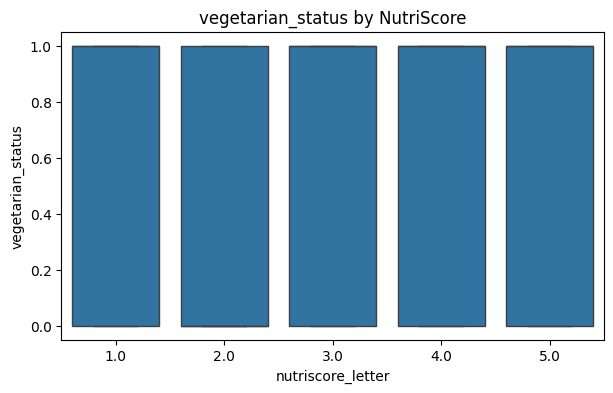

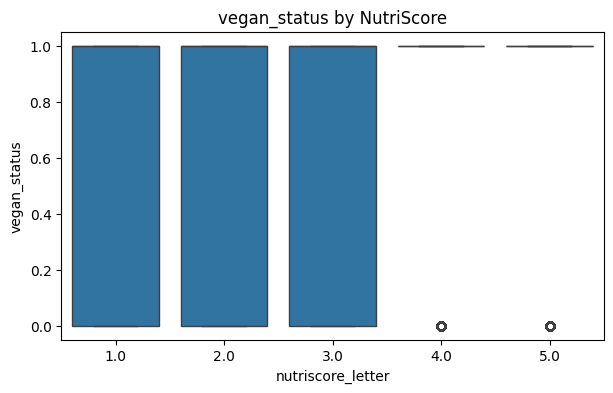

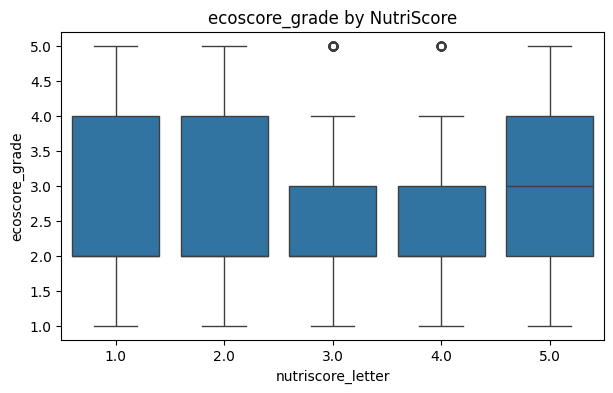

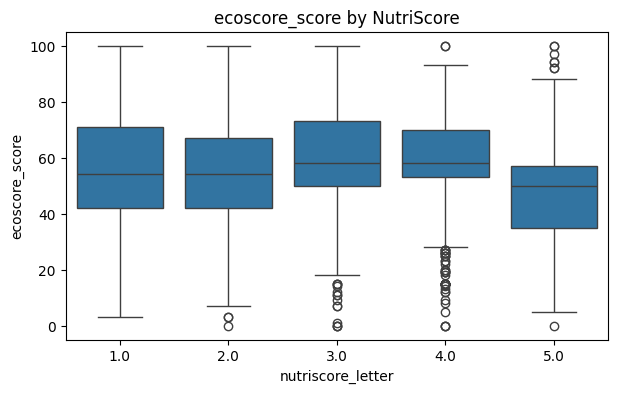

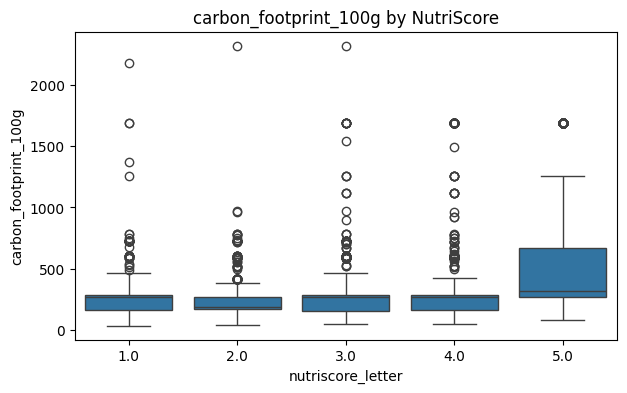

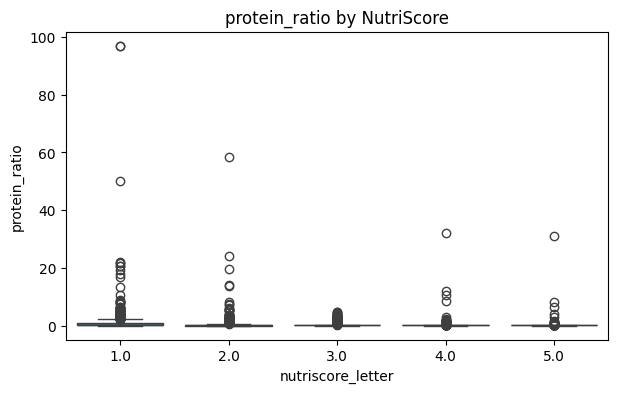

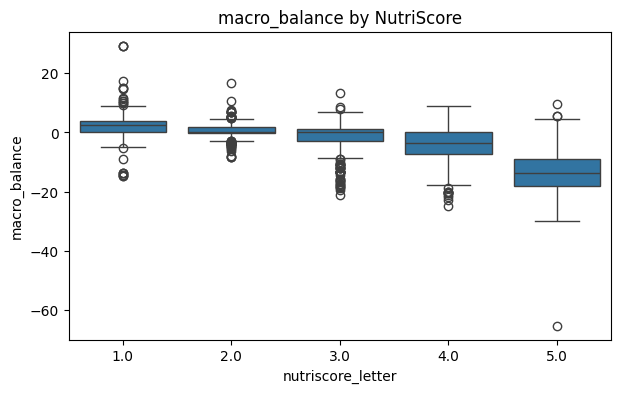

In [21]:
target = "nutriscore_letter"  
for col in features:
    if df[col].dtype != 'object':  # numeric only
        plt.figure(figsize=(7,4))
        sns.boxplot(data=df, x=target, y=col)
        plt.title(f"{col} by NutriScore")
        plt.show()

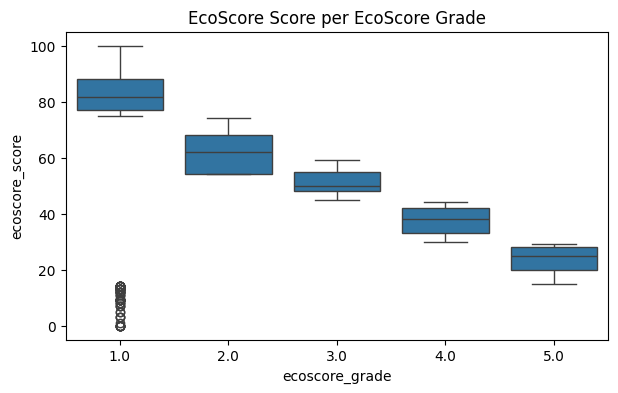

In [22]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="ecoscore_grade", y="ecoscore_score")
plt.title("EcoScore Score per EcoScore Grade")
plt.show()


In [23]:
# drop redundant columns
to_drop = [
    "log_sugars_100g",
    "energy_kcal_100g",
    "salt_100g",
    "log_fat_100g"
]

df = df.drop(columns=[c for c in to_drop if c in df.columns])

In [24]:
df.shape

(5172, 53)

In [25]:
df.to_csv("FoodFactsCleaned.csv", index=False)